In [50]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


files = {
    "vacancies_all.jl": ("Top 20 Technologies for all vacancies", "cyan"),
    "vacancies_junior.jl": ("Top 20 Technologies for Junior positions", "green"),
    "vacancies_middle.jl": ("Top 20 Technologies for Middle positions", "blue"),
    "vacancies_senior.jl": ("Top 20 Technologies for Senior positions", "orange")
}


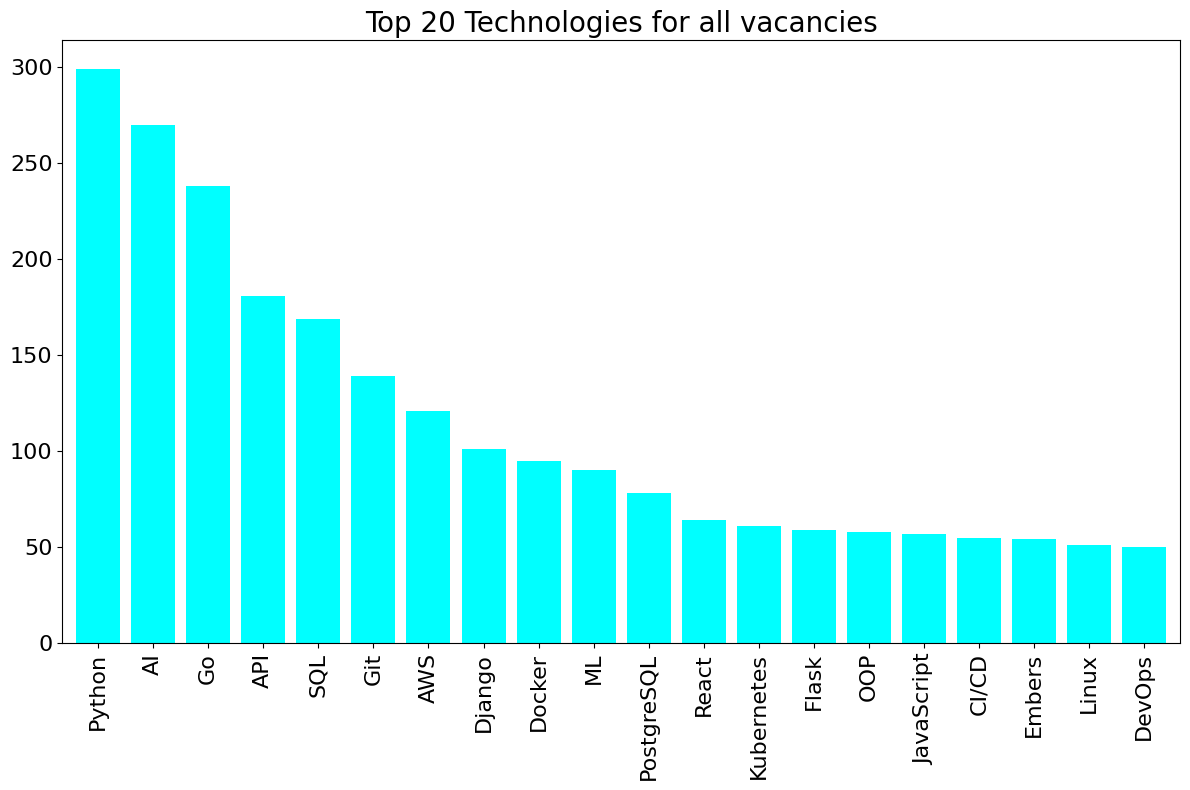

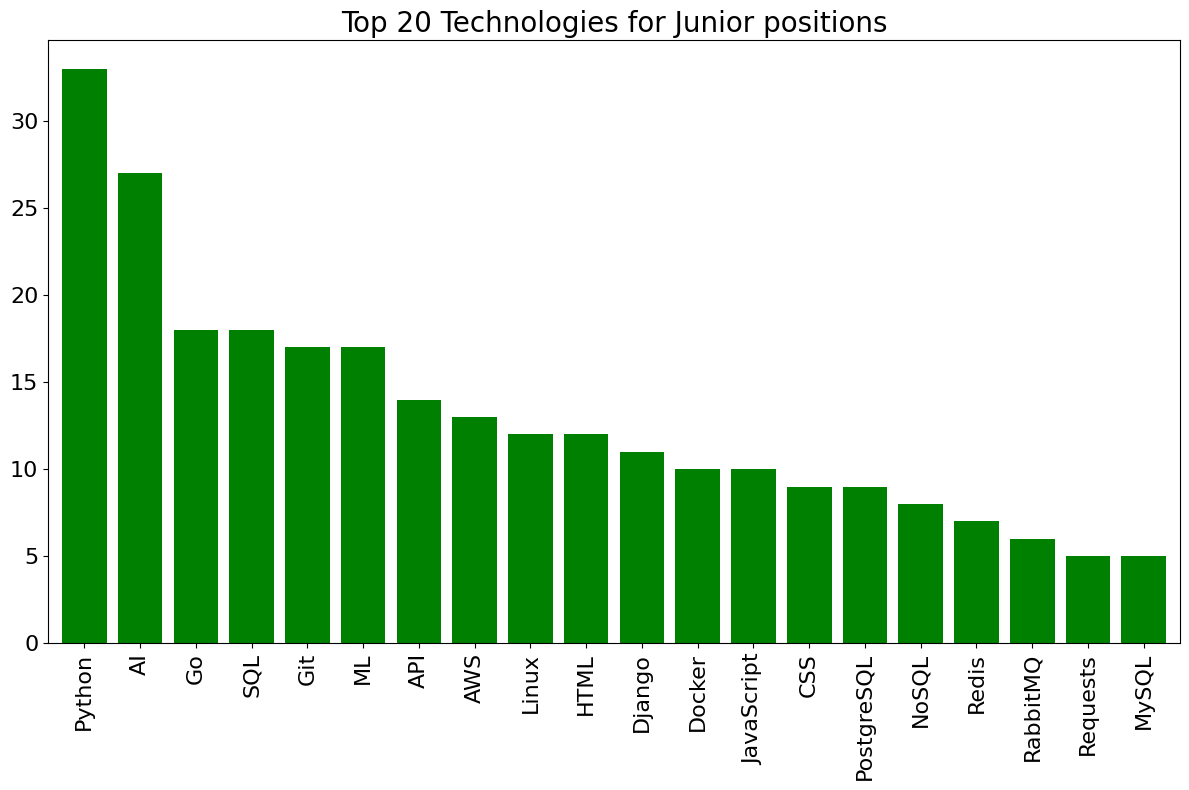

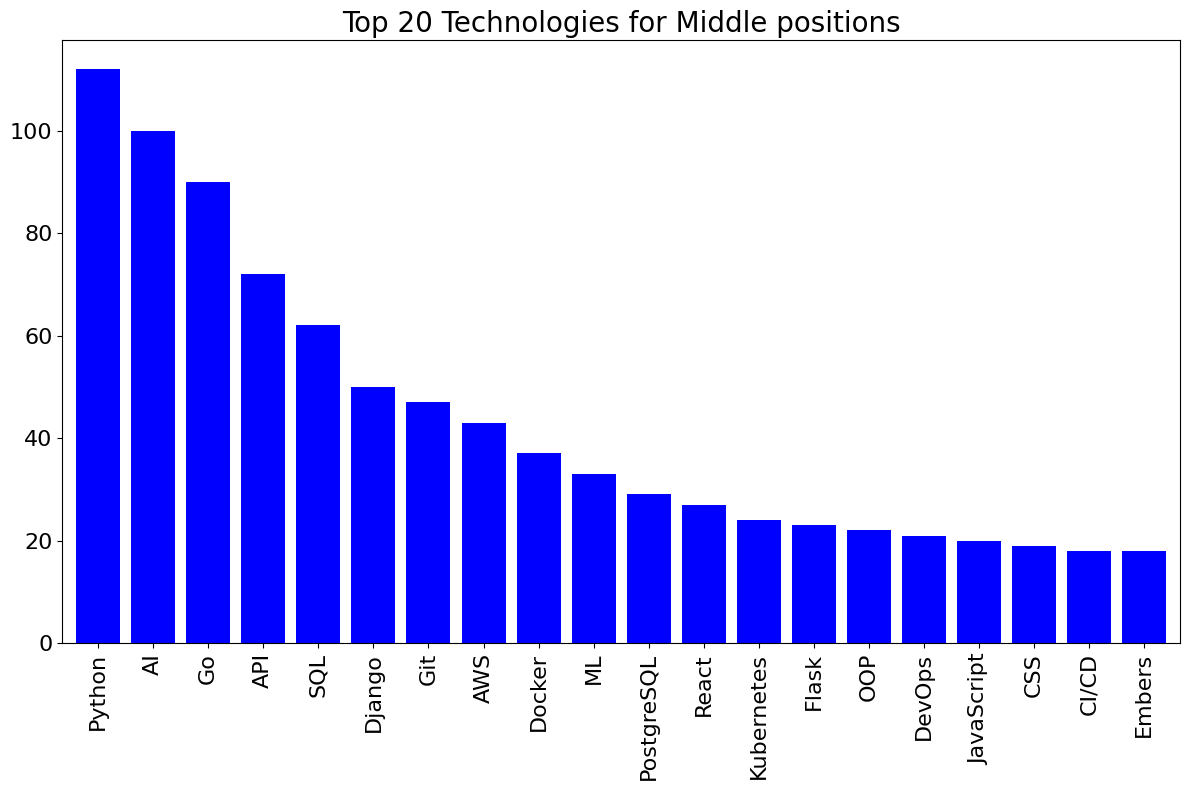

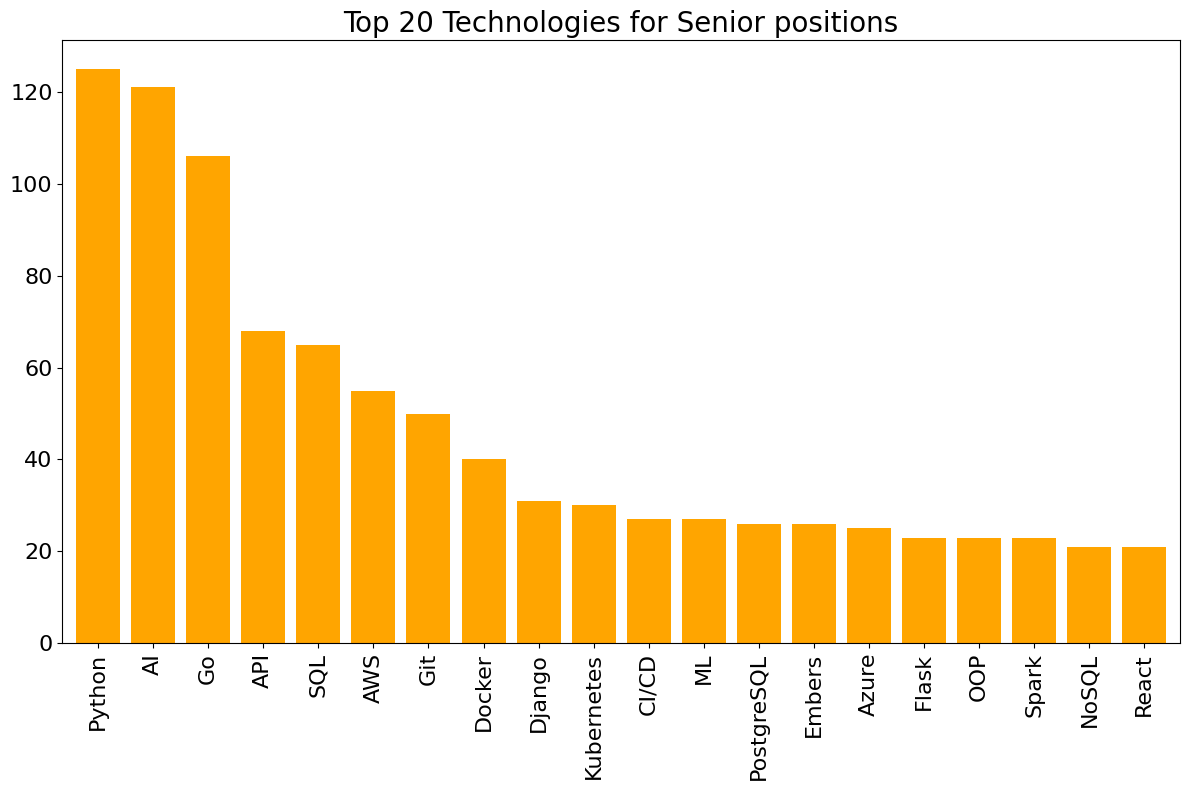

In [51]:
for file, (title, color) in files.items():
    df = pd.read_json(file, lines=True)
    technologies = df["technologies"].explode()
    top_technologies = technologies.value_counts().head(20)

    plt.figure(figsize=(12, 8))

    top_technologies.plot(kind="bar", width=0.8, color=color)

    plt.title(title, fontsize=20)
    plt.xticks(rotation=90, fontsize=16)
    plt.yticks(fontsize=16)
    plt.xlabel("")
    plt.tight_layout()
    plt.show()

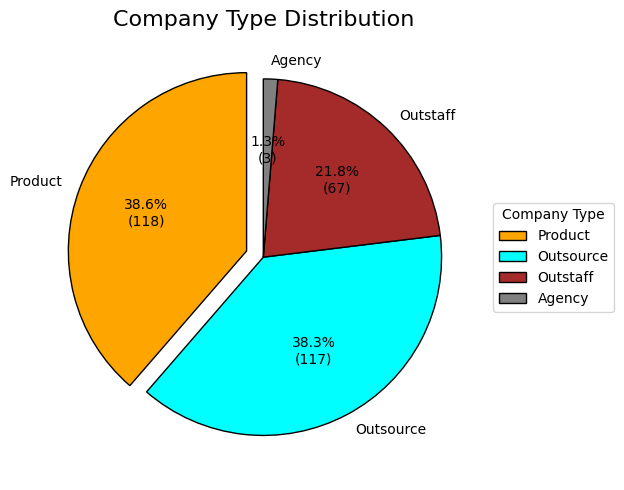

In [52]:
df_all = pd.read_json("vacancies_all.jl", lines=True)
company_counts = df_all["company_type"].value_counts()

types = company_counts.index.tolist()
data = company_counts.values.tolist()
explode = (0.1, 0.0, 0.0, 0.0)
colors = ("orange", "cyan", "brown", "grey")

def func(pct, allvalues):
    absolute = int(pct / 100. * np.sum(allvalues))
    return "{:.1f}%\n({:d})".format(pct, absolute)

fig, ax = plt.subplots(figsize=(15, 5))
wedges, texts, autotexts = ax.pie(data,
                                  autopct=lambda pct: func(pct, data),
                                  explode=explode,
                                  labels=types,
                                  colors=colors,
                                  startangle=90,
                                  wedgeprops={"linewidth": 1, "edgecolor": "black"},
                                  textprops={"color": "black"})
ax.legend(
    wedges,
    types,
    title="Company Type",
    loc="center left",
    bbox_to_anchor=(1, 0, 0.5, 1)
)
ax.set_title("Company Type Distribution", fontsize=16)

plt.tight_layout()
plt.show()
